**<span style="color:red">Namn och CID på gruppmedlemmar: </span>**

FYLL I HÄR


In [566]:
import numpy as np # Standard paket för att hantera matamatik och arrayer
import matplotlib.pyplot as plt # Standard paket för att plotta figurer
plt.style.use("ggplot")
import scipy.io as io # Vi lånar funktionen 'io' från scipy för att smidigt kunna importera .mat-filer

In [567]:
# Funktioner för HUPP:en

def fft2c(x):
    '''
    2D Fourier transform
    
    Denna är perfekt som den är. Bara att använda!
    '''
    return np.fft.fftshift(np.fft.fft2(np.fft.fftshift(x)))

def ifft2c(x):
    '''
    2D inverse Fourier transform
    
    Denna är perfekt som den är. Bara att använda!
    '''
    return np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(x)))


# Uppgift 1 - Skriv en Python-funktion som implementerar PAS!

#### Utgå från skelletkoden nedan. Funktionen är ej klar! Byt ut alla '.x.' för att få PAS funktionen att fungera.

In [568]:
def PAS(E1, L, N, a, lam0, n):
    '''
    Funktion för att propagera E1 sträckan L genom PAS
    '''
    
    # Varje sampelpunkt i k-planet motsvarar en plan våg med en viss riktning [kx,ky,kz]
    delta_k =2*np.pi/(N*a)                                            # Samplingsavstånd i k-planet
    
    kx      = np.arange(-(N/2)*delta_k, (N/2)*delta_k, delta_k) # Vektor med samplingspunkter i kx-led
    ky      = kx                                                # och ky-led
    
    KX, KY  = np.meshgrid(kx,ky)                                # k-vektorns x- resp y-komponent i varje 
                                                                # sampelpunkt i k-planet
    
    k =2*np.pi*n/lam0                                             # k-vektorns längd (skalär) för en plan våg i ett material med brytningsindex n
    
    KZ = np.sqrt(k**2-KX**2-KY**2, dtype=complex)                   # k-vektorns z-komponent i varje sampelpunkt.
                                                       # dtype=complex tillåter np.sqrt att evaluera till ett komplext tal
    
    fasfaktor_propagation = np.exp(1j*KZ*L) # Faktor för varje sampelpunkt i k-planet
                                           # multas med för att propagera sträckan L i z-led 

    A  = a**2/(2*np.pi)**2*fft2c(E1)                # Planvågsspektrum i Plan 1
    B  = A*fasfaktor_propagation        # Planvågsspektrum i Plan 2 (Planvågsspektrum i Plan 1 multat med fasfaktorn för propagation)
    E2 = N**2*delta_k**2*ifft2c(B)
    
    return E2

# Uppgift 2 - Gauss bleibt Gauss (gammalt tyskt ordspråk: Gauss förblir Gauss)

#### Kolla att en gaussisk stråle förblir gaussisk vid propagation (bara $𝜔$ ändras) ända till fjärrfältet genom att kolla hur fältet ser ut på några olika avstånd fram till $𝐿=𝑓$ (lämplig fokallängd för linsen före Plan 1 kan vara $𝑓=10$ cm och $1/e^2$-radien på infallande fält $𝜔_{in}=1$ mm, se PDF för $𝜔$-definition). <span style="background-color:yellow">Behöver ej redovisas!</span>

In [569]:
# Propagera fält med PAS
# GLÖM EJ ATT ÄNDRA VARIABLER MED '.x.'

N               = 2**10                 # NxN är antalet samplade punkter (rekommenderad storlek N=1024)
sidlaengd_Plan1 = 4e-3                  # Det samplade områdets storlek (i x- eller y-led) i Plan 1 (rekommenderad storlek 4 mm)
a               = sidlaengd_Plan1/N     # Samplingsavstånd i Plan 1 (och Plan 2 eftersom vi använder PAS)
L               = 100e-3                # Propagationssträcka (dvs avstånd mellan Plan 1 och 2)

lambda_noll = 633e-9                    # Vakuumvåglängd för rött ljus från en HeNe-laser
n_medium    = 1                         # Brytningsindex för medium mellan Plan 1 och 2
k           = 2*np.pi*n_medium/lambda_noll                     # K-vektorns längd 

In [570]:
# Definera koordianter i plan 1
x = np.arange(-(N/2)*a, (N/2)*a, a)     # Vektor med sampelpositioner i x-led
y = x                                   # och y-led

X, Y = np.meshgrid(x, y)                # Koordinatmatriser med x- och y-värdet i varje sampelposition
R    = np.sqrt(X**2 + Y**2)             # Avståndet till origo för varje sampelpunkt

In [571]:
# Definera lins och cirkulär aperatur
f_lins = 100e-3                         # Fokallängd på linsen före Plan 1
T_lins = np.exp(-1j*k*R**2/(2*f_lins))  # Transmissionsfunktion för en lins (linsen är TOK)

D_aperture = 2e-3                       # Diameter för apertur
T_aperture = R < (D_aperture/2)         # Transmissionsfunktion för en cirkulär apertur ("pupill")

In [572]:
# Definera fält i plan 1
# GLÖM EJ ATT ÄNDRA VARIABLER MED '.x.'

omega1      = 1e-3                      # 1/e2-radie (för intensiteten, dvs 1/e-radie för amplituden) för infallande Gaussiskt fält
E1_in_gauss = np.exp(-R**2/omega1**2)   # Infallande fält: Gaussiskt med plana vågfronter och normalinfall (dvs konstant fas, här=0)
E1_in_konst = np.ones(X.shape)          # Infallande fält: Konstant i hela plan 1. np.ones(X.shape) ger en matris fylld med ettor som har samma storlek som X


E1_gauss    = E1_in_gauss*T_lins         # Fältet i Plan 1 (precis efter linsen) för gaussisk stråle 
E1_cirkular = E1_in_konst* T_lins* T_aperture  # Fältet i Plan 1 (precis efter linsen) för konstant fält som passerat genom cirkulär apertur


E1          = E1_cirkular               # Välj fall!

I1      = np.abs(E1)**2     # Intensiteten är prop mot kvadraten på fältets amplitud (normalt struntar man i proportionalitetskonstanten)
I1_norm = I1/np.max(I1)     # Då vi inte är intresserade av det absoluta värdet av intensiteten så kan det vara trevligt att noramlizera intensiten innan vi plottar

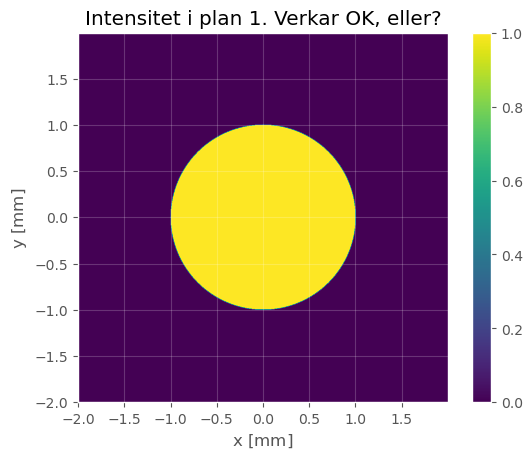

In [573]:
# Plotta intensitet i plan 1 
x_mm = x*1e3
y_mm = y*1e3

plt.figure()
image = plt.imshow(I1_norm, extent = [x_mm.min(), x_mm.max(), y_mm.min(), y_mm.max()])
plt.colorbar(image)

plt.title(r'Intensitet i plan 1. Verkar OK, eller?')
plt.xlabel(r'x $[$mm$]$')
plt.ylabel(r'y $[$mm$]$')
plt.grid(alpha=0.2)

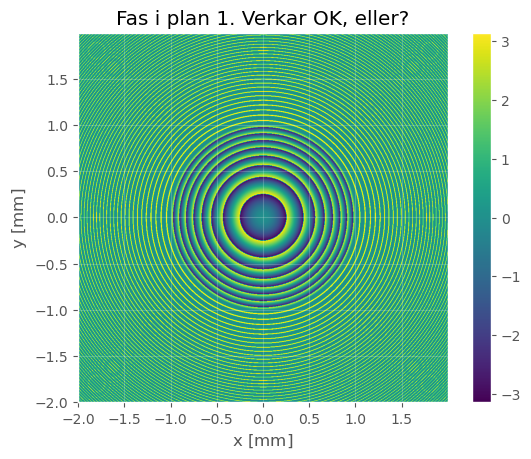

In [574]:
# Plotta fas i plan 1
plt.figure()
image = plt.imshow(np.angle(E1), extent = [x_mm.min(), x_mm.max(), y_mm.min(), y_mm.max()])
plt.colorbar(image)

plt.title(r'Fas i plan 1. Verkar OK, eller?')
plt.xlabel(r'x $[$mm$]$')
plt.ylabel(r'y $[$mm$]$')
plt.grid(alpha=0.2)

In [575]:
# Propagera till plan 2
# GLÖM EJ ATT ÄNDRA VARIABLER MED '.x.'

E2      = PAS(E1, L, N, a, lambda_noll, n_medium)         # Propagera med vår PAS funktion
I2      = np.abs(E2)**2    # Intesitet i plan 2
I2_norm = I2/np.max(I2)    # Normaliserad intensitet i plan 2 för att plotta

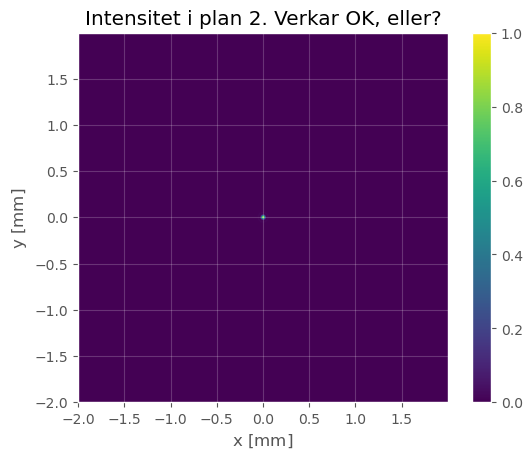

In [576]:
# Plotta intensitet i plan 2 
plt.figure()
image = plt.imshow(I2_norm, extent = [x_mm.min(), x_mm.max(), y_mm.min(), y_mm.max()])
plt.colorbar(image)

plt.title(r'Intensitet i plan 2. Verkar OK, eller?')
plt.xlabel(r'x $[$mm$]$')
plt.ylabel(r'y $[$mm$]$')
plt.grid(alpha=0.2)

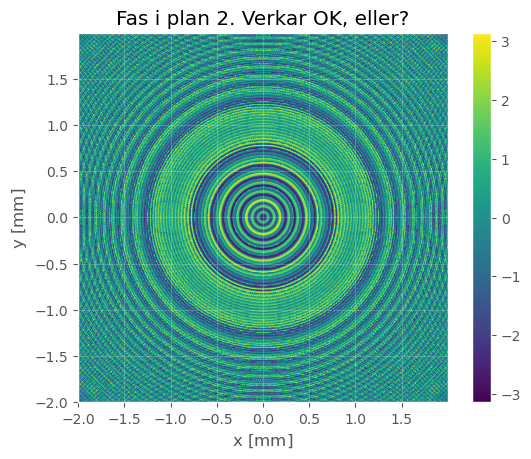

In [577]:
# Plotta fas i plan 2
plt.figure()
image = plt.imshow(np.angle(E2), extent = [x_mm.min(), x_mm.max(), y_mm.min(), y_mm.max()])
plt.colorbar(image)

plt.title(r'Fas i plan 2. Verkar OK, eller?')
plt.xlabel(r'x $[$mm$]$')
plt.ylabel(r'y $[$mm$]$')
plt.grid(alpha=0.2)

# Uppgift 3 - Gauss-strålens minsta spotsize

#### Kolla tumregeln om minsta spotsize, $D_{spot}=𝐶 \frac{𝜆}{D_{start}} 𝐿$, där $𝐶≈1$. Gör det för specialfallet gaussisk stråle ($𝜔_{in}=1$ mm) som fokuseras med hjälp av lins med $𝑓=10$ cm respektive $𝑓=1$ m. För definition av stråldiametern $𝐷$, använd i båda planen $𝐷=2𝜔$, där $𝜔$ är $1/e^2$-radien för intensiteten i respektive plan.

In [578]:
# KOD
# Propagera till plan 2
# GLÖM EJ ATT ÄNDRA VARIABLER MED '.x.'

f_1 = 10*1e-2
f_2 = 1

# Definiera lins             
T_lins1 = np.exp(-1j*k*R**2/(2*f_1)) 

E1    = E1_in_gauss*T_lins1*T_aperture 

E2      = PAS(E1, f_1, N, a, lambda_noll, n_medium)         # Propagera med vår PAS funktion
I2      = np.abs(E2)**2    # Intesitet i plan 2
I2_norm = I2/np.max(I2)    # Normaliserad intensitet i plan 2 för att plotta

In [579]:

def coolshit(target_value, matrix):
    indices = np.where(matrix == target_value)
    
    diff_matrix = np.abs(matrix - target_value)
    y, x = np.unravel_index(np.argmin(diff_matrix), matrix.shape)
    
    element_X = X[y, x]
    element_Y = Y[y, x]
    element_I = I2_norm[y, x]
    vec1 = np.array([element_X, element_Y])
    return vec1
vec = coolshit(1, I2_norm) - coolshit(1/np.exp(2),I2_norm)
D_norm = 2*np.linalg.norm(vec)
C = D_norm * omega1 *2 /(lambda_noll*f_1)
print(C)

1.7970255453397819


(1024, 1024)


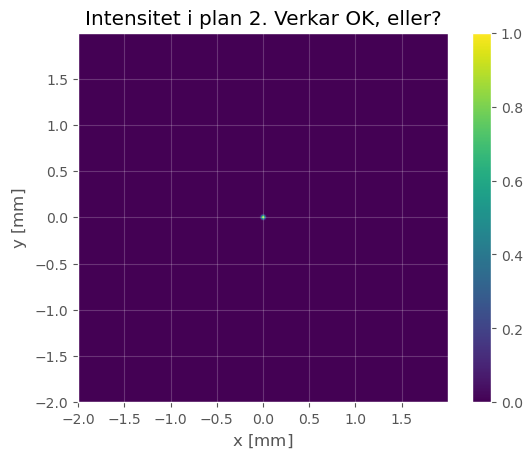

In [580]:
# Plotta intensitet i plan 2 
plt.figure()
image = plt.imshow(I2_norm, extent = [x_mm.min(), x_mm.max(), y_mm.min(), y_mm.max()])
plt.colorbar(image)

plt.title(r'Intensitet i plan 2. Verkar OK, eller?')
plt.xlabel(r'x $[$mm$]$')
plt.ylabel(r'y $[$mm$]$')
plt.grid(alpha=0.2)
print(np.shape(X))



In [581]:
T_lins2 = np.exp(-1j*k*R**2/(2*f_2)) 

E1    = E1_in_gauss*T_lins2*T_aperture 

E2      = PAS(E1, f_2, N, a, lambda_noll, n_medium)         # Propagera med vår PAS funktion
I2      = np.abs(E2)**2    # Intesitet i plan 2
I2_norm = I2/np.max(I2)    # Normaliserad intensitet i plan 2 för att plotta

In [582]:
vec = coolshit(1, I2_norm) - coolshit(1/np.exp(2),I2_norm)
D_norm = np.linalg.norm(vec)
C = D_norm * omega1 *2 /(lambda_noll*f_2)
print(C)

0.9252401665675024


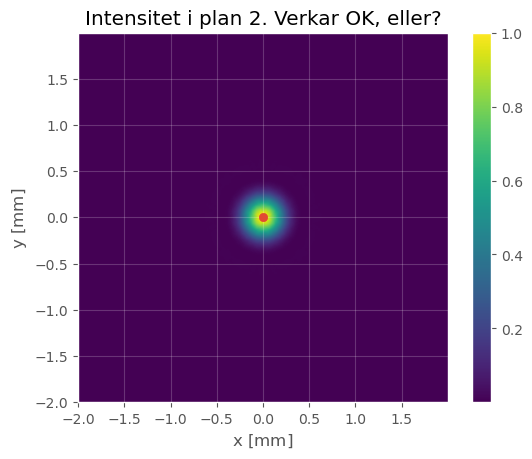

In [583]:
x_p, y_p = coolshit(1, I2_norm)
plt.figure()
image = plt.imshow(I2_norm, extent = [x_mm.min(), x_mm.max(), y_mm.min(), y_mm.max()])
plt.colorbar(image)
plt.scatter(x_p, y_p)
plt.title(r'Intensitet i plan 2. Verkar OK, eller?')
plt.xlabel(r'x $[$mm$]$')
plt.ylabel(r'y $[$mm$]$')
plt.grid(alpha=0.2)


#### **Vad blir det mer exakta värdet på $𝐶$ för den gaussiska strålen med den valda definitionen av $𝐷$?**

*SVARA HÄR*

# Uppgift 4 - Cirkulära strålens minsta spotsize

#### Gör samma sak som i uppgift 3 fast nu ska fältet i Plan 1 ha konstant intensitet i ett cirkulärt tvärsnitt (diameter $D_{start}$), och $D_{spot}$ i Plan 2 definieras som ”innersta mörka ringens” diameter (vilket är en ganska generös definition av spotdiameter, så $𝐶$ bör bli klart större än 1).

In [584]:
# KOD

#### **Vad blir det mer exakta värdet på $𝐶$ för den cirkulära strålen och de valda definitionerna av $𝐷$?**

*SVARA HÄR*

#### **Kan du i något av fallen $𝑓= 10$ cm eller $𝑓=1$ m se svaga tecken på numeriska fel i simuleringen av intensitetsfördelningen i fjärrfältet?**

*SVARA HÄR*

# Uppgift 5 - Möt en annan medlem i gauss-strålens storfamilj!

#### Det finns en hel lycklig familj med fält som delar gausstrålens egenskap att inte ändra form (förutom storlek) när de propagerar: så kallade *hermite-gaussiska strålar*. En av dessa strålar fås helt enkelt genom att multiplicera den (vanliga) gaussiska strålen i startplanet med $𝑥$. Kolla att detta infält också håller formen vid propagation ända till fjärrfältet! <span style="background-color:yellow">Behöver ej redovisas!</span>

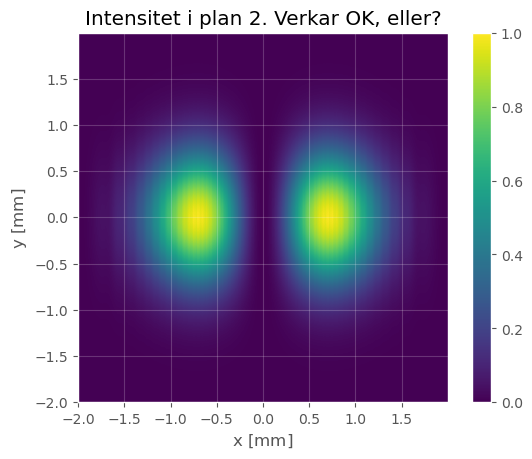

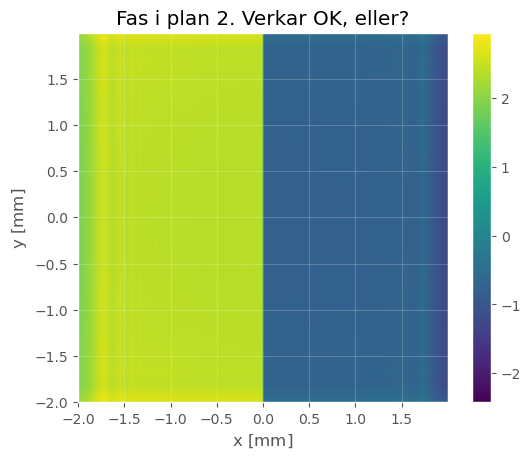

In [ ]:

T_lins2 = np.exp(-1j*k*R**2/(2*f_2)) 

E1_hermitgauss = E1_in_gauss*X

E2      = PAS(E1_hermitgauss, 10e-2, N, a, lambda_noll, n_medium)         # Propagera med vår PAS funktion
I2      = np.abs(E2)**2    # Intesitet i plan 2
I2_norm = I2/np.max(I2)  

plt.figure()
image = plt.imshow(I2_norm, extent = [x_mm.min(), x_mm.max(), y_mm.min(), y_mm.max()])
plt.colorbar(image)

plt.title(r'Intensitet i plan 2. Verkar OK, eller?')
plt.xlabel(r'x $[$mm$]$')
plt.ylabel(r'y $[$mm$]$')
plt.grid(alpha=0.2)

plt.figure()
image = plt.imshow(np.angle(E2), extent = [x_mm.min(), x_mm.max(), y_mm.min(), y_mm.max()])
plt.colorbar(image)

plt.title(r'Fas i plan 2. Verkar OK, eller?')
plt.xlabel(r'x $[$mm$]$')
plt.ylabel(r'y $[$mm$]$')
plt.grid(alpha=0.2)

#Vi har kollat med många fokallängder mellan 0 och 1 meter och formen bibehålls.

# Uppgift 6 - Dubbla budskap

In [586]:
# Ladda in DOE såhär!
DOE = np.flip(io.loadmat('T_DOE_gen2.mat'))

FileNotFoundError: [Errno 2] No such file or directory: 'T_DOE_gen2.mat'

In [ ]:
# Skapa det elektriska fältet som träffar ögat och propagera med pas
E_in = .x.
E2 = PAS(.x.)

In [ ]:
# Fältet som har propagerats genom DOE och 'de vises lins' är smidigt att
# plotta i logaritmisk skala för att bilden ska vara tydlig.
# Alltså plotta fältet i plan 2 så här!
I2      = np.abs(E2)**2    
I2_norm = np.log(I2/np.max(I2))  # Log av den normaliserade intensiteten i plan 2

x_mm = x*1e3
y_mm = y*1e3

plt.figure()
image = plt.imshow(I2_norm, extent = [x_mm.min(), x_mm.max(), y_mm.min(), y_mm.max()])
plt.colorbar(image)

#### **Vilket är det ofarliga meddelandet i den bifogade DOE-koden av generation 2-typ?** 

*SVARA HÄR*

#### **Och vilken styrka krävs på ”de vises lins” för att läsa det farliga budskapet i samma kod? Testa dig fram med olika värden på styrkan hos de vises lins tills du kan urskilja budskapet.**

*SVARA HÄR*